In [5]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

#노트북에 그래프를 그리기 위해
%matplotlib inline

#그래프 마이너스 폰트 깨지는 문제 대처
mpl.rcParams['axes.unicode_minus'] = False

#그래프 한글 폰트 깨지는 문제 대처
# path = 'C:/Windows/Fonts/NanumGothic.ttf'
path = 'C:/Windows/Fonts/LGSmHaR.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
font = {'family' : font_name,
        'size'   : 16}
plt.rc('font', **font)

In [6]:
df_raw = pd.read_csv('d:/test_1.txt', sep = '\t')
df = df_raw.copy()

### 맵핑 금액 102,421백만원(53.9%), 미맵핑 금액 87,554 백만원(46.1%)

In [7]:
# 금액이 0인 6185건 SO 제외
df = df[df['SO_DOL_AMT'] != 0.0]

In [15]:
df['구분자'] = df['SALES_CHANCE_ID'].map(lambda x : '맵핑' if x > 0 else '미맵핑')

In [16]:
df[df['구분자'] == '미맵핑']

,SALES_CHANCE_ID,SO_4,SO_NO,ORD_TYPE_CD,MAIN_CCTR,MAIL_BILLTO,SLIP_YM,SO_DOL_AMT,POL_REGION,POL_CD,POD_REGION,POD_CD,구분자
38,NaN,F,STJF181100001046,ISEA,A1001096,1016918,201901,1134.51,CHINA,CNXIP,ASIA,IDJKT,미맵핑
267,NaN,F,SHQF181200006384,ISEA,G1001005,1153535,201901,3168.67,KOREA,KRKAN,ASIA,PKKHI,미맵핑
994,NaN,F,SHQF181200004550,ISEA,E5001023,1004475,201901,65.43,KOREA,KRPUS,AMERICA,MXZLO,미맵핑
1009,NaN,F,SHQF190100009250,ISEA,B3001060,1105024,201901,1437.45,KOREA,KRPUS,CHINA,CNSHA,미맵핑
1115,NaN,F,SHQF181100022788,IAIR,D5001013,2000323,201901,267.78,KOREA,KRICN,EUROPE,ITVCE,미맵핑
1125,NaN,F,SHQF181200006074,ISEA,B3001150,2000210,201901,-222.40,KOREA,KRPUS,CHINA,CNZJG,미맵핑
1126,NaN,F,SHQF181200009843,ISEA,B3001150,2000210,201901,-222.40,KOREA,KRPUS,CHINA,CNZJG,미맵핑
2922,NaN,F,SHQF181200011872,ISEA,B1101042,1000054,201901,50.00,KOREA,KRINC,CHINA,CNXIP,미맵핑
2935,NaN,F,STJF181100001279,ISEA,EC001002,1016951,201901,235.82,CHINA,CNXIP,AMERICA,ARBUE,미맵핑
3002,NaN,F,SSHF181100005023,ISEA,D5001010,1154425,201901,4465.94,CHINA,CNNKG,EUROPE,DEHAM,미맵핑


In [21]:
print("미맵핑 건수 : {:,}  금액 : {:,}".format(df[df['구분자']=='미맵핑']]['SO_DOL_AMT'].count(), df[df['구분자']=='미맵핑']]['SO_DOL_AMT'].sum()) \n
     "미맵핑 건수 : {:,}  금액 : {:,}".format(df[df['구분자']=='맵핑']]['SO_DOL_AMT'].count(), df[df['구분자']=='맵핑']]['SO_DOL_AMT'].sum())))

SyntaxError: invalid syntax (<ipython-input-21-98c04a007d27>, line 1)

In [5]:
# 금액 비율 맵핑 53.9%, 미맵핑 46.1%
df.groupby('구분자')['WCUR_SELL_AMT'].sum()/df['WCUR_SELL_AMT'].sum()*100

구분자
맵핑     53.912933
미매핑    46.087067
Name: WCUR_SELL_AMT, dtype: float64

In [6]:
# 건수 비율 맵핑 41.8%, 미맵핑 58.2%
df.groupby('구분자')['WCUR_SELL_AMT'].count()/df['WCUR_SELL_AMT'].count()*100

구분자
맵핑     41.05762
미매핑    58.94238
Name: WCUR_SELL_AMT, dtype: float64

In [7]:
df_none = df[df['구분자'] == '미매핑']

In [8]:
print("미맵핑 건수 : {:,}  금액 : {:,}".format(df_none['WCUR_SELL_AMT'].count(), df_none['WCUR_SELL_AMT'].sum()))

미맵핑 건수 : 102,601  금액 : 87,554,504,094


### 철송파트 거래 제외 194건, 1,098 백만원

In [9]:
# 철송파트 제거
print("철송파트거래 건수 : {:,}  금액 : {:,}".format(df[df['MAIL_BILLTO'].str.contains('DEP00', na=False)]['WCUR_SELL_AMT'].count(), \
                                    df[df['MAIL_BILLTO'].str.contains('DEP00', na=False)]['WCUR_SELL_AMT'].sum()))

철송파트거래 건수 : 194  금액 : 1,098,985,205


In [10]:
# 철송파트 194건, 1,098,985,205금액 제외 
df = df[~df['MAIL_BILLTO'].str.contains('DEP00', na=False)]

### FNS 거래 제외 105건, 2,412 백만원

In [11]:
# FNS 거래
print("FNS 거래 건수 : {:,}, 금액 : {:,}".format(df[df['MAIN_CCTR'] == 'X2001009']['WCUR_SELL_AMT'].count(), \
                                    df[df['MAIN_CCTR'] == 'X2001009']['WCUR_SELL_AMT'].sum()))

FNS 거래 건수 : 105, 금액 : 2,412,519,765


In [12]:
# FNS 거래 105건 금액 2,412,235,098 제거
df = df[~df['MAIN_CCTR'].str.contains('X2001009')]

In [ ]:
### 하이로 설치물류 거래 제외 29,335건, 7,561 백만원

In [35]:
df[df['hi'].str.match('H') | df['hi'].str.match('U')]

,SO_NO,hi,ORDER_TYPE,SALES_CHANCE_ID,CORP_CD,Perf._Div.,Perf._Team/Corp,MAIN_CCTR,MAIN_CCTR_NM,MAIL_BILLTO,...,Biz Mode,OWNER_ID,OWNER_NM,OWNER_CCTR,OWNER_CCTR_NM,Opty_Div.,Opty_Team/Corp,ORIGN_SELL_AMT,DOL_SELL_AMT,WCUR_SELL_AMT
0,SARU181200000001,U,OTHS,18110000020240,R,남미사업담당,아르헨티나 법인,EF001003,아르헨티나_창고,1161367,...,SEA,Non-Maping,Non-Maping,Non-Maping,Non-Maping,Non-Maping,Non-Maping,-17888.55,-474.04,-530024
1,SARU181200000002,U,OTHS,18110000020240,EF00,남미사업담당,아르헨티나 법인,EF001003,아르헨티나_창고,1161367,...,SEA,Non-Maping,Non-Maping,Non-Maping,Non-Maping,Non-Maping,Non-Maping,-5995.28,-158.87,-177633
2,SARU190100000002,U,OTHS,18110000020240,EF00,남미사업담당,아르헨티나 법인,EF001003,아르헨티나_창고,1161367,...,SEA,Non-Maping,Non-Maping,Non-Maping,Non-Maping,Non-Maping,Non-Maping,0.00,0.00,18416
3,SARU190100000003,U,OTHS,18110000020240,EF00,남미사업담당,아르헨티나 법인,EF001003,아르헨티나_창고,1161367,...,SEA,Non-Maping,Non-Maping,Non-Maping,Non-Maping,Non-Maping,Non-Maping,0.00,0.00,4894
4,SARU190100000008,U,OTHS,18110000020240,EF00,남미사업담당,아르헨티나 법인,EF001003,아르헨티나_창고,1161367,...,SEA,Non-Maping,Non-Maping,Non-Maping,Non-Maping,Non-Maping,Non-Maping,-158.48,-4.21,-4758
5,SARU190200000007,U,OTHS,18110000020240,EF00,남미사업담당,아르헨티나 법인,EF001003,아르헨티나_창고,1161367,...,SEA,Non-Maping,Non-Maping,Non-Maping,Non-Maping,Non-Maping,Non-Maping,1184159.62,31617.05,35673845
6,SARU190200000008,U,OTHS,18110000020240,EF00,남미사업담당,아르헨티나 법인,EF001003,아르헨티나_창고,1161367,...,SEA,Non-Maping,Non-Maping,Non-Maping,Non-Maping,Non-Maping,Non-Maping,425562.69,11362.52,12827691
7,SARU190300000003,U,OTHS,18110000020240,EF00,남미사업담당,아르헨티나 법인,EF001003,아르헨티나_창고,1161367,...,SEA,Non-Maping,Non-Maping,Non-Maping,Non-Maping,Non-Maping,Non-Maping,985314.67,25421.11,28840249
8,SARU190300000004,U,OTHS,18110000020240,EF00,남미사업담당,아르헨티나 법인,EF001003,아르헨티나_창고,1161367,...,SEA,Non-Maping,Non-Maping,Non-Maping,Non-Maping,Non-Maping,Non-Maping,278453.06,7184.08,8150338
9,SARU190400000009,U,OTHS,18110000020240,EF00,남미사업담당,아르헨티나 법인,EF001003,아르헨티나_창고,1161367,...,SEA,Non-Maping,Non-Maping,Non-Maping,Non-Maping,Non-Maping,Non-Maping,921723.65,21660.50,24703800


In [36]:
# 하이로 거래
print("하이로설치 거래 건수 : {:,}, 금액 : {:,}".format(df[df['hi'].str.match('H') | df['hi'].str.match('U')]['WCUR_SELL_AMT'].count(), \
                                    df[df['hi'].str.match('H') | df['hi'].str.match('U')]['WCUR_SELL_AMT'].sum()))

하이로설치 거래 건수 : 29,335, 금액 : 7,561,400,998


In [43]:
# 하이로 설치물류 거래 제외 29,335건, 7,561 백만원
df = df[~(df['hi'].str.match('H') | df['hi'].str.match('U'))]

In [44]:
df_none = df[df['구분자'] == '미매핑']
print("미맵핑 건수 : {:,}, 금액 : {:,}".format(df_none['WCUR_SELL_AMT'].count(), df_none['WCUR_SELL_AMT'].sum()))

미맵핑 건수 : 76,808, 금액 : 77,343,017,787


In [14]:
df_none.groupby(['Perf._Div.'])[['WCUR_SELL_AMT']].sum()

,WCUR_SELL_AMT
Perf._Div.,
CIS사업담당,801600603
W&D KAM사업담당,203174876
W&D한국사업담당,8028602706
남미사업담당,1194039003
부산신항,866228008
북미사업담당,2236770417
설치물류담당,13307381
아시아사업담당,14210607678
운송사업담당,7603245712


In [15]:
df_none['WCUR_SELL_AMT'].describe()

count    1.023040e+05
mean     8.215054e+05
std      9.404469e+06
min     -5.642808e+08
25%      2.102600e+04
50%      1.100000e+05
75%      3.406320e+05
max      1.344119e+09
Name: WCUR_SELL_AMT, dtype: float64

In [16]:
df_none.loc[ (df_none['WCUR_SELL_AMT'] <= -1.000000e+08), 'WCUR_SELL_AMT_RANK'] = -8
df_none.loc[ (df_none['WCUR_SELL_AMT'] <= -5.000000e+07) & (df_none['WCUR_SELL_AMT'] > -1.000000e+08), 'WCUR_SELL_AMT_RANK'] = -7.5
df_none.loc[ (df_none['WCUR_SELL_AMT'] <= -1.000000e+07) & (df_none['WCUR_SELL_AMT'] > -5.000000e+07), 'WCUR_SELL_AMT_RANK'] = -7
df_none.loc[ (df_none['WCUR_SELL_AMT'] <= -5.000000e+06) & (df_none['WCUR_SELL_AMT'] > -1.000000e+07), 'WCUR_SELL_AMT_RANK'] = -6.5
df_none.loc[ (df_none['WCUR_SELL_AMT'] <= -1.000000e+06) & (df_none['WCUR_SELL_AMT'] > -5.000000e+06), 'WCUR_SELL_AMT_RANK'] = -6
df_none.loc[ (df_none['WCUR_SELL_AMT'] <= -5.000000e+05) & (df_none['WCUR_SELL_AMT'] > -1.000000e+06), 'WCUR_SELL_AMT_RANK'] = -5.5
df_none.loc[ (df_none['WCUR_SELL_AMT'] <= -1.000000e+05) & (df_none['WCUR_SELL_AMT'] > -5.000000e+05), 'WCUR_SELL_AMT_RANK'] = -5
df_none.loc[ (df_none['WCUR_SELL_AMT'] <= -1.000000e+04) & (df_none['WCUR_SELL_AMT'] > -1.000000e+05), 'WCUR_SELL_AMT_RANK'] = -4

df_none.loc[ (df_none['WCUR_SELL_AMT'] <= 1.000000e+04) & (df_none['WCUR_SELL_AMT'] > -1.000000e+04), 'WCUR_SELL_AMT_RANK'] = 0

df_none.loc[ (df_none['WCUR_SELL_AMT'] <= 1.000000e+05) & (df_none['WCUR_SELL_AMT'] > 1.000000e+04), 'WCUR_SELL_AMT_RANK'] = 4
df_none.loc[ (df_none['WCUR_SELL_AMT'] <= 5.000000e+05) & (df_none['WCUR_SELL_AMT'] > 1.000000e+05), 'WCUR_SELL_AMT_RANK'] = 5
df_none.loc[ (df_none['WCUR_SELL_AMT'] <= 1.000000e+06) & (df_none['WCUR_SELL_AMT'] > 5.000000e+05), 'WCUR_SELL_AMT_RANK'] = 5.5
df_none.loc[ (df_none['WCUR_SELL_AMT'] <= 5.000000e+06) & (df_none['WCUR_SELL_AMT'] > 1.000000e+06), 'WCUR_SELL_AMT_RANK'] = 6
df_none.loc[ (df_none['WCUR_SELL_AMT'] <= 1.000000e+07) & (df_none['WCUR_SELL_AMT'] > 5.000000e+06), 'WCUR_SELL_AMT_RANK'] = 6.5
df_none.loc[ (df_none['WCUR_SELL_AMT'] <= 5.000000e+07) & (df_none['WCUR_SELL_AMT'] > 1.000000e+07), 'WCUR_SELL_AMT_RANK'] = 7
df_none.loc[ (df_none['WCUR_SELL_AMT'] <= 1.000000e+08) & (df_none['WCUR_SELL_AMT'] > 5.000000e+07), 'WCUR_SELL_AMT_RANK'] = 7.5
df_none.loc[ (df_none['WCUR_SELL_AMT'] <= 5.000000e+08) & (df_none['WCUR_SELL_AMT'] > 1.000000e+08), 'WCUR_SELL_AMT_RANK'] = 8
df_none.loc[ (df_none['WCUR_SELL_AMT'] <= 1.000000e+09) & (df_none['WCUR_SELL_AMT'] > 5.000000e+08), 'WCUR_SELL_AMT_RANK'] = 8.5
df_none.loc[ (df_none['WCUR_SELL_AMT'] > 1.000000e+09), 'WCUR_SELL_AMT_RANK'] = 9

C:\Users\user\AppData\Local\Continuum\anaconda364\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\user\AppData\Local\Continuum\anaconda364\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


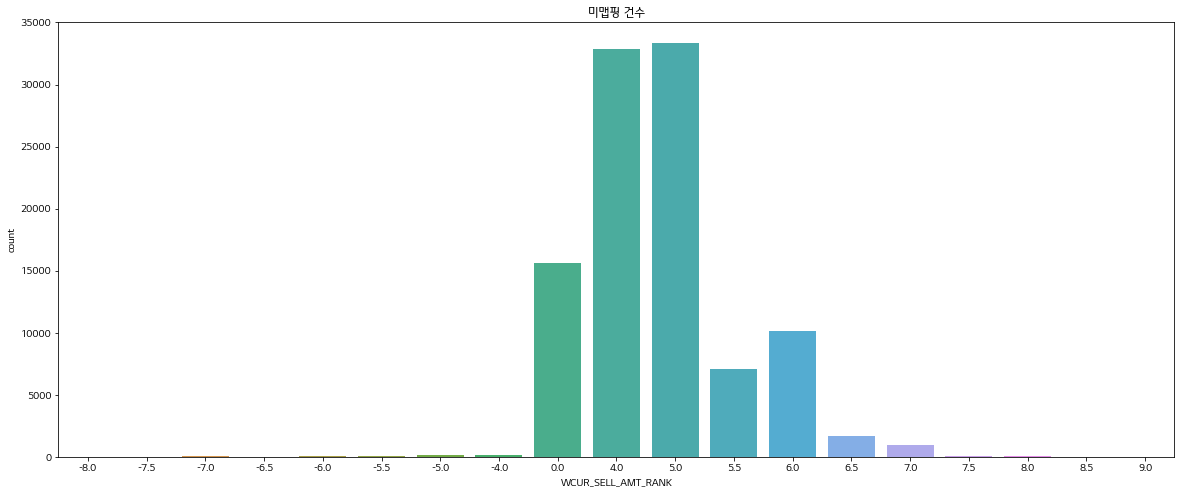

In [17]:
plt.figure(figsize=(20,8))
sns.countplot(x="WCUR_SELL_AMT_RANK", data=df_none)
plt.title("미맵핑 건수")
plt.show()

# 문제가 되는 건들은 SO 단일 건으로 봤을때 절대값 6.5 이상, 500만원 이상 건들로 보는것을 제안함

In [18]:
df_temp = df_none.groupby(by = 'WCUR_SELL_AMT_RANK')['WCUR_SELL_AMT'].sum().reset_index()

In [180]:
df_temp[df_temp[WCUR_SELL_AMT_RANK > ]]

,WCUR_SELL_AMT_RANK,WCUR_SELL_AMT
0,-8.0,-899939580
1,-7.0,-1322506628
2,-6.0,-324602762
3,-5.0,-79058573
4,-4.0,-6064965
5,0.0,44415279
6,4.0,1402652263
7,5.0,12669429635
8,6.0,33774778597
9,7.0,24200576543


In [195]:
df_focus = df_none[(df_none['WCUR_SELL_AMT_RANK'] >= 6.5) | (df_none['WCUR_SELL_AMT_RANK'] <= - 6.5)]
df_none.to_csv('d:/data/df_focus.csv', encoding = 'UTF-8', index = True)

In [38]:
plt.figure(figsize=(20,8))
sns.countplot(x="WCUR_SELL_AMT_RANK", data=df_focus)
plt.title("Non-mapping count")
plt.show()

# 문제가 되는 건들은 SO 단일 건으로 봤을때 절대값 6.5 이상, 500만원 이상 건들로 보는것을 제안함

NameError: name 'df_focus' is not defined

<Figure size 1440x576 with 0 Axes>

In [193]:
df_focus.groupby(by=['Perf._Div.'])['WCUR_SELL_AMT'].agg(['sum', 'mean','count'])

,sum,mean,count
Perf._Div.,,,
CIS사업담당,562875528,1.148726e+07,49
W&D한국사업담당,6872738207,1.010697e+08,68
남미사업담당,440688255,1.762753e+07,25
부산신항,308746573,2.572888e+07,12
북미사업담당,1521066887,1.491242e+07,102
아시아사업담당,7440584406,2.113802e+07,352
운송사업담당,1398735278,1.916076e+07,73
유럽사업담당,7552168741,2.534285e+07,298
인도/중아사업담당,1683115485,1.237585e+07,136


In [194]:
print("Target 미맵핑 건수 : {:,}  금액 : {:,}".format(df_focus['WCUR_SELL_AMT'].count(), df_focus['WCUR_SELL_AMT'].sum()))

Target 미맵핑 건수 : 2,791  금액 : 47,914,018,884


### -6 이하, 6 이상의 금액인 SO 건들을 맵핑 대상으로 다시 정의했을 때 맵핑률은?

In [187]:
df.loc[ (df['WCUR_SELL_AMT'] <= -1.000000e+08), 'WCUR_SELL_AMT_RANK'] = -8
df.loc[ (df['WCUR_SELL_AMT'] <= -5.000000e+07) & (df['WCUR_SELL_AMT'] > -1.000000e+08), 'WCUR_SELL_AMT_RANK'] = -7.5
df.loc[ (df['WCUR_SELL_AMT'] <= -1.000000e+07) & (df['WCUR_SELL_AMT'] > -5.000000e+07), 'WCUR_SELL_AMT_RANK'] = -7
df.loc[ (df['WCUR_SELL_AMT'] <= -5.000000e+06) & (df['WCUR_SELL_AMT'] > -1.000000e+07), 'WCUR_SELL_AMT_RANK'] = -6.6
df.loc[ (df['WCUR_SELL_AMT'] <= -1.000000e+06) & (df['WCUR_SELL_AMT'] > -5.000000e+06), 'WCUR_SELL_AMT_RANK'] = -6
df.loc[ (df['WCUR_SELL_AMT'] <= -5.000000e+05) & (df['WCUR_SELL_AMT'] > -1.000000e+06), 'WCUR_SELL_AMT_RANK'] = -5.5
df.loc[ (df['WCUR_SELL_AMT'] <= -1.000000e+05) & (df['WCUR_SELL_AMT'] > -5.000000e+05), 'WCUR_SELL_AMT_RANK'] = -5
df.loc[ (df['WCUR_SELL_AMT'] <= -1.000000e+04) & (df['WCUR_SELL_AMT'] > -1.000000e+05), 'WCUR_SELL_AMT_RANK'] = -4

df.loc[ (df['WCUR_SELL_AMT'] <= 1.000000e+04) & (df['WCUR_SELL_AMT'] > -1.000000e+04), 'WCUR_SELL_AMT_RANK'] = 0

df.loc[ (df['WCUR_SELL_AMT'] <= 1.000000e+05) & (df['WCUR_SELL_AMT'] > 1.000000e+04), 'WCUR_SELL_AMT_RANK'] = 4
df.loc[ (df['WCUR_SELL_AMT'] <= 5.000000e+05) & (df['WCUR_SELL_AMT'] > 1.000000e+05), 'WCUR_SELL_AMT_RANK'] = 5
df.loc[ (df['WCUR_SELL_AMT'] <= 1.000000e+06) & (df['WCUR_SELL_AMT'] > 5.000000e+05), 'WCUR_SELL_AMT_RANK'] = 5.5
df.loc[ (df['WCUR_SELL_AMT'] <= 5.000000e+06) & (df['WCUR_SELL_AMT'] > 1.000000e+06), 'WCUR_SELL_AMT_RANK'] = 6
df.loc[ (df['WCUR_SELL_AMT'] <= 1.000000e+07) & (df['WCUR_SELL_AMT'] > 5.000000e+06), 'WCUR_SELL_AMT_RANK'] = 6.5
df.loc[ (df['WCUR_SELL_AMT'] <= 5.000000e+07) & (df['WCUR_SELL_AMT'] > 1.000000e+07), 'WCUR_SELL_AMT_RANK'] = 7
df.loc[ (df['WCUR_SELL_AMT'] <= 1.000000e+08) & (df['WCUR_SELL_AMT'] > 5.000000e+07), 'WCUR_SELL_AMT_RANK'] = 7.5
df.loc[ (df['WCUR_SELL_AMT'] <= 5.000000e+08) & (df['WCUR_SELL_AMT'] > 1.000000e+08), 'WCUR_SELL_AMT_RANK'] = 8
df.loc[ (df['WCUR_SELL_AMT'] <= 1.000000e+09) & (df['WCUR_SELL_AMT'] > 5.000000e+08), 'WCUR_SELL_AMT_RANK'] = 8.5
df.loc[ (df['WCUR_SELL_AMT'] > 1.000000e+09), 'WCUR_SELL_AMT_RANK'] = 9

In [136]:
df[(df['WCUR_SELL_AMT_RANK'] >= 6) | (df['WCUR_SELL_AMT_RANK'] <= - 6)].groupby('구분자')['WCUR_SELL_AMT'].sum()

구분자
맵핑     101728650268
미매핑     86112984363
Name: WCUR_SELL_AMT, dtype: int64

In [272]:
# 금액 비율 맵핑 56.5%, 미맵핑 43.5%
df[(df['WCUR_SELL_AMT_RANK'] >= 6) | (df['WCUR_SELL_AMT_RANK'] <= - 6)].groupby('구분자')['WCUR_SELL_AMT'].sum() / \
df[(df['WCUR_SELL_AMT_RANK'] >= 6) | (df['WCUR_SELL_AMT_RANK'] <= - 6)]['WCUR_SELL_AMT'].sum() * 100

구분자
맵핑     56.514762
미매핑    43.485238
Name: WCUR_SELL_AMT, dtype: float64

In [273]:
# 건수 비율 맵핑 57.7%, 미맵핑 42.3%
df[(df['WCUR_SELL_AMT_RANK'] >= 6) | (df['WCUR_SELL_AMT_RANK'] <= - 6)].groupby('구분자')['WCUR_SELL_AMT'].count() / \
df[(df['WCUR_SELL_AMT_RANK'] >= 6) | (df['WCUR_SELL_AMT_RANK'] <= - 6)]['WCUR_SELL_AMT'].count() * 100

구분자
맵핑     57.712463
미매핑    42.287537
Name: WCUR_SELL_AMT, dtype: float64

In [148]:
df_temp = df_focus.groupby(by=['Perf._Div.'])['WCUR_SELL_AMT'].agg(['sum', 'mean','count'])
df_temp

,sum,mean,count
Perf._Div.,,,
CIS사업담당,798435729,1.724483e+06,463
W&D KAM사업담당,187500896,2.400780e+05,781
W&D한국사업담당,7760181316,3.319154e+06,2338
남미사업담당,1181374321,1.194514e+06,989
부산신항,838947858,5.131180e+05,1635
북미사업담당,2227905500,3.072973e+06,725
설치물류담당,13273200,1.327320e+06,10
아시아사업담당,14002403578,1.767534e+06,7922
운송사업담당,7018971459,3.518458e+05,19949


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173771 entries, 0 to 180254
Data columns (total 27 columns):
SO_NO                 173668 non-null object
hi                    173668 non-null object
ORDER_TYPE            173668 non-null object
SALES_CHANCE_ID       173771 non-null object
CORP_CD               173771 non-null object
Perf._Div.            173771 non-null object
Perf._Team/Corp       173771 non-null object
MAIN_CCTR             173771 non-null object
MAIN_CCTR_NM          173771 non-null object
MAIL_BILLTO           173771 non-null object
MAIN_BILLTO_NM        173771 non-null object
SALES_EMP             173771 non-null object
SALES_EMP_NM          173771 non-null object
MASTER_OPP_ID         173771 non-null object
MASTER_OPP_NM         78070 non-null object
구분자                   173771 non-null object
Biz Mode              173696 non-null object
OWNER_ID              173771 non-null object
OWNER_NM              173771 non-null object
OWNER_CCTR            173771 non-nu

In [274]:
df_pivot = df.groupby([ \
                        '구분자', 'ORDER_TYPE', 'MAIN_CCTR', 'MAIN_CCTR_NM', 'MAIL_BILLTO', 'MAIN_BILLTO_NM', 'SALES_EMP', 'SALES_EMP_NM' \
                      ])['WCUR_SELL_AMT'].agg(['sum', 'mean','count']).reset_index()

In [275]:
df_pivot.loc[ (df_pivot['sum'] <= -1.000000e+08), 'RANK_AMT'] = -100000
df_pivot.loc[ (df_pivot['sum'] <= -5.000000e+07) & (df_pivot['sum'] > -1.000000e+08), 'RANK_AMT'] = -50000
df_pivot.loc[ (df_pivot['sum'] <= -1.000000e+07) & (df_pivot['sum'] > -5.000000e+07), 'RANK_AMT'] = -10000
df_pivot.loc[ (df_pivot['sum'] <= -5.000000e+06) & (df_pivot['sum'] > -1.000000e+07), 'RANK_AMT'] = -5000
df_pivot.loc[ (df_pivot['sum'] <= -1.000000e+06) & (df_pivot['sum'] > -5.000000e+06), 'RANK_AMT'] = -1000
df_pivot.loc[ (df_pivot['sum'] <= -5.000000e+05) & (df_pivot['sum'] > -1.000000e+06), 'RANK_AMT'] = -500
df_pivot.loc[ (df_pivot['sum'] <= -1.000000e+05) & (df_pivot['sum'] > -5.000000e+05), 'RANK_AMT'] = -100
df_pivot.loc[ (df_pivot['sum'] <= -1.000000e+04) & (df_pivot['sum'] > -1.000000e+05), 'RANK_AMT'] = -10

df_pivot.loc[ (df_pivot['sum'] <= 1.000000e+04) & (df_pivot['sum'] > -1.000000e+04), 'RANK_AMT'] = 0

df_pivot.loc[ (df_pivot['sum'] <= 1.000000e+05) & (df_pivot['sum'] > 1.000000e+04), 'RANK_AMT'] = 10
df_pivot.loc[ (df_pivot['sum'] <= 5.000000e+05) & (df_pivot['sum'] > 1.000000e+05), 'RANK_AMT'] = 100
df_pivot.loc[ (df_pivot['sum'] <= 1.000000e+06) & (df_pivot['sum'] > 5.000000e+05), 'RANK_AMT'] = 500
df_pivot.loc[ (df_pivot['sum'] <= 5.000000e+06) & (df_pivot['sum'] > 1.000000e+06), 'RANK_AMT'] = 1000
df_pivot.loc[ (df_pivot['sum'] <= 1.000000e+07) & (df_pivot['sum'] > 5.000000e+06), 'RANK_AMT'] = 5000
df_pivot.loc[ (df_pivot['sum'] <= 5.000000e+07) & (df_pivot['sum'] > 1.000000e+07), 'RANK_AMT'] = 10000
df_pivot.loc[ (df_pivot['sum'] <= 1.000000e+08) & (df_pivot['sum'] > 5.000000e+07), 'RANK_AMT'] = 50000
df_pivot.loc[ (df_pivot['sum'] <= 5.000000e+08) & (df_pivot['sum'] > 1.000000e+08), 'RANK_AMT'] = 100000
df_pivot.loc[ (df_pivot['sum'] <= 1.000000e+09) & (df_pivot['sum'] > 5.000000e+08), 'RANK_AMT'] = 500000
df_pivot.loc[ (df_pivot['sum'] > 1.000000e+09), 'RANK_AMT'] = 1000000

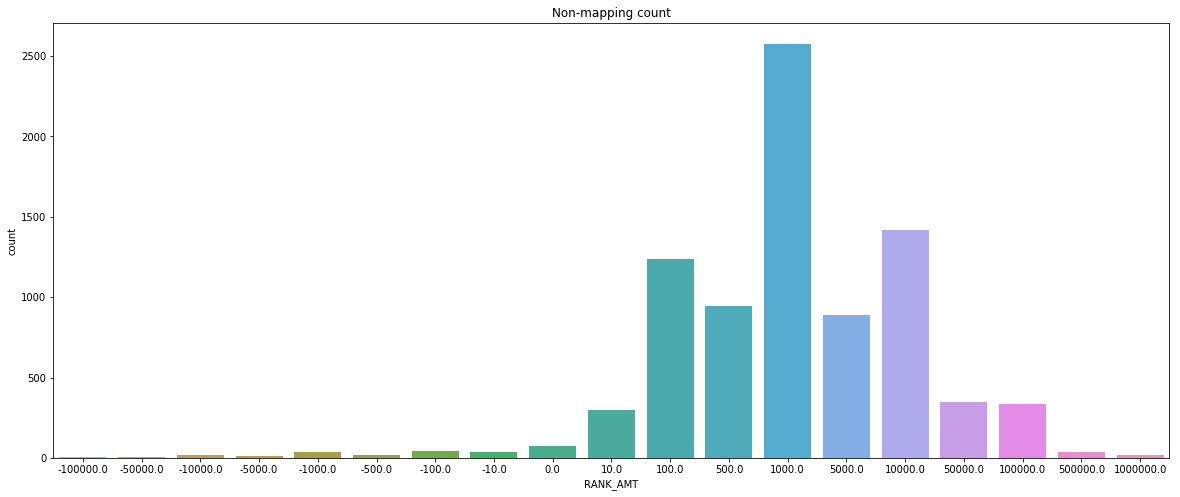

In [276]:
plt.figure(figsize=(20,8))
sns.countplot(x="RANK_AMT", data=df_pivot)
plt.title("Non-mapping count")
plt.show()

# 문제가 되는 건들은 SO 단일 건으로 봤을때 절대값 500만원 이상 건들로 보는것을 제안함

In [236]:
df_focus_all = df_pivot[(df_pivot['RANK_AMT'] >= 5000) | (df_pivot['RANK_AMT'] <= - 5000)]

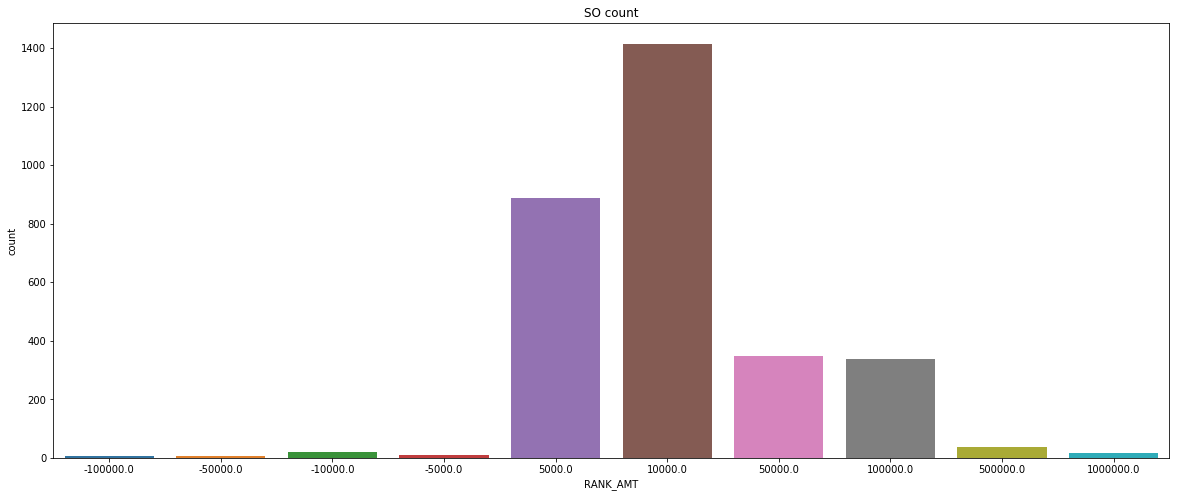

In [238]:
plt.figure(figsize=(20,8))
sns.countplot(x="RANK_AMT", data=df_focus_all)
plt.title("SO count")
plt.show()

# 문제가 되는 건들은 SO 단일 건으로 봤을때 절대값 6.5 이상, 500만원 이상 건들로 보는것을 제안함

In [249]:
df_focus_all.reset_index()

,index,구분자,ORDER_TYPE,MAIN_CCTR,MAIN_CCTR_NM,MAIL_BILLTO,MAIN_BILLTO_NM,SALES_EMP,SALES_EMP_NM,sum,mean,count,RANK_AMT
0,0,맵핑,DCLR,B3001143,상해W&D파트_외고교_통합,1017003,AUK SEMICONDUCTOR(SH) CO.LTD,32123,엄태현,8969037,4.484518e+06,2,5000.0
1,1,맵핑,DCLR,B3001143,상해W&D파트_외고교_통합,1017382,"KODENSHI(SHANGHAI)CO.,LTD",32123,엄태현,9214950,4.607475e+06,2,5000.0
2,16,맵핑,DCLR,CB001010,F/F팀_통관파트,1127376,"BEIERSDORF PHILIPPINES, INC",37223,MARY GRACE PERMEJO,10367805,1.481115e+06,7,10000.0
3,34,맵핑,DCLR,E9001001,콜롬비아_국제운송,1117409,C.I. NEXTRADING LTDA,42083,안종관,11845718,2.961430e+06,4,10000.0
4,39,맵핑,DCLR,EC001002,파나마_국제운송,1171626,"ALAMEDA DC , S DE RL",39768,"QUIROZ, JOSE",101548007,1.692467e+07,6,100000.0
5,42,맵핑,DCLR,F5001002,블라디보스톡 통관 파트,1148908,LLC MOBIS PARTS CIS,40517,КОРОТКОВА АННА НИКОЛАЕВНА,23293586,1.294088e+06,18,10000.0
6,50,맵핑,DRAL,B3001140,상해W&D파트_상해창고_통합1,1160176,"WUXI JIASHENG PARTY LOGISTICS CO.,LTD.",32123,엄태현,243863556,7.389805e+06,33,100000.0
7,51,맵핑,DRAL,B3001141,상해W&D파트_상해창고_통합2,1160176,"WUXI JIASHENG PARTY LOGISTICS CO.,LTD.",32123,엄태현,285028237,6.786387e+06,42,100000.0
8,56,맵핑,DTRK,A1001100,포워딩화학수출영업팀,1004105,GS CALTEX CORPORATION,27146,홍현빈,45730244,9.146049e+06,5,10000.0
9,60,맵핑,DTRK,A1001113,해운내륙운송(4),1004105,GS CALTEX CORPORATION,29362,조성혁,183445109,2.061181e+06,89,100000.0


In [264]:
df_focus_all.groupby(by = ['RANK_AMT'])['sum'].sum()/df_focus_all['sum'].sum()*100

RANK_AMT
-100000.0     -1.032970
-50000.0      -0.215773
-10000.0      -0.360462
-5000.0       -0.046565
 5000.0        3.547664
 10000.0      17.847123
 50000.0      13.640995
 100000.0     38.298617
 500000.0     14.187721
 1000000.0    14.133651
Name: sum, dtype: float64

In [240]:
df_focus_all

,구분자,ORDER_TYPE,MAIN_CCTR,MAIN_CCTR_NM,MAIL_BILLTO,MAIN_BILLTO_NM,SALES_EMP,SALES_EMP_NM,sum,mean,count,RANK_AMT
0,맵핑,DCLR,B3001143,상해W&D파트_외고교_통합,1017003,AUK SEMICONDUCTOR(SH) CO.LTD,32123,엄태현,8969037,4.484518e+06,2,5000.0
1,맵핑,DCLR,B3001143,상해W&D파트_외고교_통합,1017382,"KODENSHI(SHANGHAI)CO.,LTD",32123,엄태현,9214950,4.607475e+06,2,5000.0
16,맵핑,DCLR,CB001010,F/F팀_통관파트,1127376,"BEIERSDORF PHILIPPINES, INC",37223,MARY GRACE PERMEJO,10367805,1.481115e+06,7,10000.0
34,맵핑,DCLR,E9001001,콜롬비아_국제운송,1117409,C.I. NEXTRADING LTDA,42083,안종관,11845718,2.961430e+06,4,10000.0
39,맵핑,DCLR,EC001002,파나마_국제운송,1171626,"ALAMEDA DC , S DE RL",39768,"QUIROZ, JOSE",101548007,1.692467e+07,6,100000.0
42,맵핑,DCLR,F5001002,블라디보스톡 통관 파트,1148908,LLC MOBIS PARTS CIS,40517,КОРОТКОВА АННА НИКОЛАЕВНА,23293586,1.294088e+06,18,10000.0
50,맵핑,DRAL,B3001140,상해W&D파트_상해창고_통합1,1160176,"WUXI JIASHENG PARTY LOGISTICS CO.,LTD.",32123,엄태현,243863556,7.389805e+06,33,100000.0
51,맵핑,DRAL,B3001141,상해W&D파트_상해창고_통합2,1160176,"WUXI JIASHENG PARTY LOGISTICS CO.,LTD.",32123,엄태현,285028237,6.786387e+06,42,100000.0
56,맵핑,DTRK,A1001100,포워딩화학수출영업팀,1004105,GS CALTEX CORPORATION,27146,홍현빈,45730244,9.146049e+06,5,10000.0
60,맵핑,DTRK,A1001113,해운내륙운송(4),1004105,GS CALTEX CORPORATION,29362,조성혁,183445109,2.061181e+06,89,100000.0


In [132]:
df_pivot = df_pivot.rename(columns = {'WCUR_SELL_AMT_x' : 'd_count', \
                                      'WCUR_SELL_AMT_y' : 'd_sum', \
                                      'WCUR_SELL_AMT' : 'd_mean' })

In [133]:
df_pivot.sort_values('d_mean', ascending = False)

,,,,,d_count,d_sum,d_mean
MAIN_CCTR,MAIN_CCTR_NM,MAIL_BILLTO,MAIN_BILLTO_NM,Biz Mode,,,
A1001393,(Local) 서이천센터,1118137,DKSH KOREA LTD,SEA,4,3882626492,9.706566e+08
C3001017,W/H팀_창이창고_호텔신라,1112354,SHILLA TRAVEL RETAIL PTE. LTD,SEA,3,1194901270,3.983004e+08
A1001274,벌크운영파트,1172316,ASIA GREEN ENERGY PUBLIC COMPANY LIMITED,SEA,1,341833743,3.418337e+08
D9001093,터키 해운팀,1109672,KHOSHNAW COMPANY,SEA,3,844401867,2.814673e+08
C8001035,북부영업,1157200,ALS SDS CO.,SEA,3,688327202,2.294424e+08
A1001334,(Local) 부산2센터,1140106,"HYUNDAI GLOBAL SERVICE CO., LTD",SEA,5,853023015,1.706046e+08
A1001274,벌크운영파트,1173370,HTK SHIPPING AND IMPORT EXPORT COMPANY LIMITED,SEA,1,164516043,1.645160e+08
A1001387,(Local) MTV센터(1),1153903,"LS Automotive Technologies Co., Ltd.",SEA,9,1335883461,1.484315e+08
H1003001,도쿄해운,1009288,CANON INC.,SEA,6,854547636,1.424246e+08


In [32]:
df_pivot.to_csv('d:/data/pivot.csv', encoding = 'UTF-8', index = True)